# Exercise 4

Rebecca Ghidoni

ID:2026709
***

## Exercise 1 - Six Boxes Toy Model : inference

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
user_up = function(s) {
    if (s==0) c(0,1/5,2/5,3/5,4/5,1)
    else c(1,4/5,3/5,2/5,1/5,0)
}

H0 = c(1,1,1,1,1)
H1 = c(1,1,1,1,0)
H2 = c(1,1,1,0,0)
H3 = c(1,1,0,0,0)
H4 = c(1,0,0,0,0)
H5 = c(0,0,0,0,0)
boxes = list(H0,H1,H2,H3,H4,H5)
box = sample(1:6,1)


Prob = function(inp){
    P = matrix(c(1/6,1/6,1/6,1/6,1/6,1/6))
    P = cbind(P,matrix(unlist(map(inp,user_up)), nrow=6))
    P = t(apply(P,1,cumprod))
    P = apply(P,2,function(x) x/sum(x))
    return(P)}
              
inp = c()

cat('Number of extraction: 0\n')
cat('H0:0.1666667, H1:0.1666667, H2:0.1666667, H3:0.1666667, H4:0.1666667, H5:0.1666667\n')
cat('\n')
for (t in 1:7) {
    inp = c(inp,sample(boxes[[box]],size=1, replace = TRUE))
    cat('Number of extraction:',t,'  ')
    if (inp[[length(inp)]] == 1)cat("Black\n")
    else cat("White\n")
    
    prob = Prob(inp)
    
    cat("H0:",prob[1,t+1],", H1:",prob[2,t+1],", H2:",prob[3,t+1],", H3:",prob[4,t+1],", H4:",prob[5,t+1],", H5:",prob[6,t+1],'\n')
    cat('\n')   
}




Number of extraction: 0
H0:0.1666667, H1:0.1666667, H2:0.1666667, H3:0.1666667, H4:0.1666667, H5:0.1666667

Number of extraction: 1   Black
H0: 0.3333333 , H1: 0.2666667 , H2: 0.2 , H3: 0.1333333 , H4: 0.06666667 , H5: 0 

Number of extraction: 2   Black
H0: 0.4545455 , H1: 0.2909091 , H2: 0.1636364 , H3: 0.07272727 , H4: 0.01818182 , H5: 0 

Number of extraction: 3   Black
H0: 0.5555556 , H1: 0.2844444 , H2: 0.12 , H3: 0.03555556 , H4: 0.004444444 , H5: 0 

Number of extraction: 4   Black
H0: 0.6384065 , H1: 0.2614913 , H2: 0.08273749 , H3: 0.01634321 , H4: 0.00102145 , H5: 0 

Number of extraction: 5   Black
H0: 0.7062147 , H1: 0.2314124 , H2: 0.05491525 , H3: 0.007231638 , H4: 0.0002259887 , H5: 0 

Number of extraction: 6   Black
H0: 0.7616378 , H1: 0.1996588 , H2: 0.03553497 , H3: 0.003119669 , H4: 4.874482e-05 , H5: 0 

Number of extraction: 7   Black
H0: 0.8068681 , H1: 0.1692125 , H2: 0.02258714 , H3: 0.001321973 , H4: 1.032791e-05 , H5: 0 



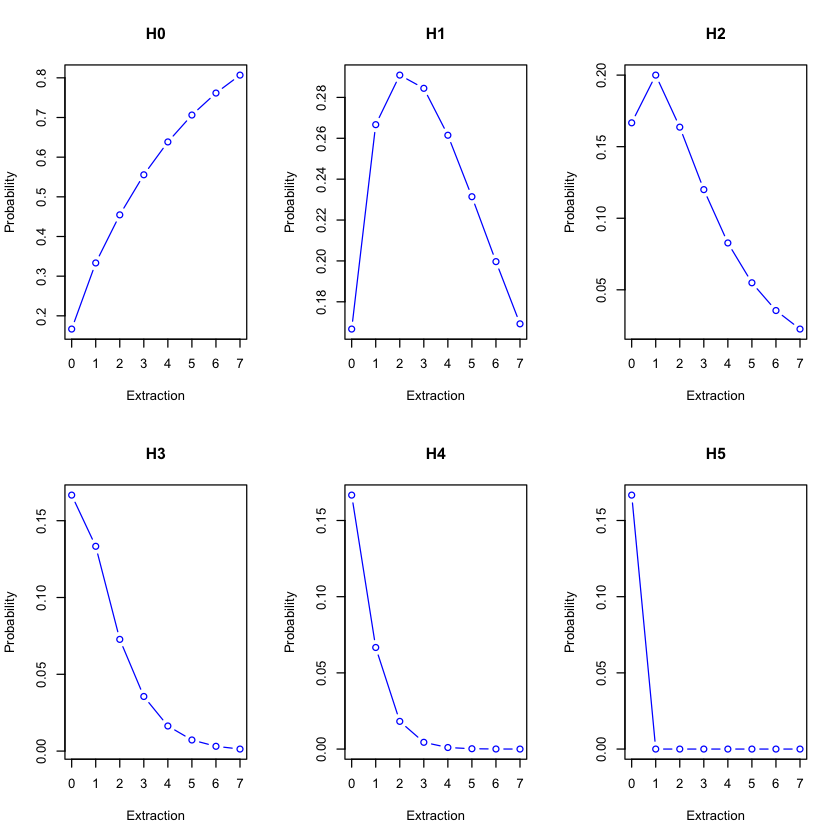

In [3]:
layout(matrix(1:6, nrow=2, ncol = 3, byrow = TRUE))
for (i in 1:6){
    plot(0:(length(inp)), prob[i,0:(length(inp)+1)], main = paste0("H",i-1), xlab="Extraction", ylab="Probability",  type='b',col='blue')}

# Exercise 2 - Six Boxes Toy Model : simulation

In [4]:
inp = c()
ask = FALSE
while (ask == FALSE) {
    temp = readline("1 for black, 0 for white (to exit press any other key) ")
    if ((temp == 0) | (temp == 1)) {
        inp = c(inp,temp)
    }
    else {break}
    prob = Prob(inp)
    

message("Probabilities: H0:",format(prob[1,(length(inp)+1)], nsmall = 2)," H1:",format(prob[2,(length(inp)+1)], nsmall = 2)," H2:",format(prob[3,(length(inp)+1)], nsmall = 2)," H3:",format(prob[4,(length(inp)+1)], nsmall = 2)," H4:",format(prob[5,(length(inp)+1)], nsmall = 2)," H5:",format(prob[6,(length(inp)+1)], nsmall = 2))
}

1 for black, 0 for white (to exit press any other key) 1


Probabilities: H0:0.3333333 H1:0.2666667 H2:0.20 H3:0.1333333 H4:0.06666667 H5:0.00


1 for black, 0 for white (to exit press any other key) 1


Probabilities: H0:0.4545455 H1:0.2909091 H2:0.1636364 H3:0.07272727 H4:0.01818182 H5:0.00


1 for black, 0 for white (to exit press any other key) 1


Probabilities: H0:0.5555556 H1:0.2844444 H2:0.12 H3:0.03555556 H4:0.004444444 H5:0.00


1 for black, 0 for white (to exit press any other key) 0


Probabilities: H0:0.00 H1:0.4383562 H2:0.369863 H3:0.1643836 H4:0.02739726 H5:0.00


1 for black, 0 for white (to exit press any other key) 0


Probabilities: H0:0.00 H1:0.2461538 H2:0.4153846 H3:0.2769231 H4:0.06153846 H5:0.00


1 for black, 0 for white (to exit press any other key) 1


Probabilities: H0:0.00 H1:0.3459459 H2:0.4378378 H3:0.1945946 H4:0.02162162 H5:0.00


1 for black, 0 for white (to exit press any other key) 0


Probabilities: H0:0.00 H1:0.1828571 H2:0.4628571 H3:0.3085714 H4:0.04571429 H5:0.00


1 for black, 0 for white (to exit press any other key) 0


Probabilities: H0:0.00 H1:0.08247423 H2:0.4175258 H3:0.4175258 H4:0.08247423 H5:0.00


1 for black, 0 for white (to exit press any other key) 0


Probabilities: H0:0.00 H1:0.03298969 H2:0.3340206 H3:0.5010309 H4:0.1319588 H5:0.00


1 for black, 0 for white (to exit press any other key) 2


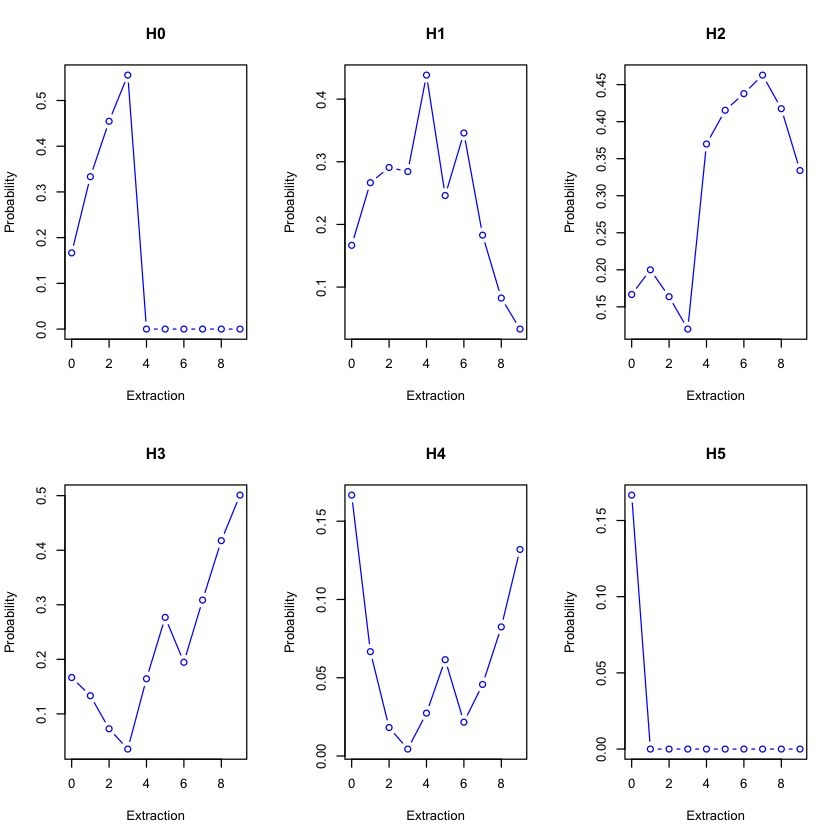

In [5]:
layout(matrix(1:6, nrow=2, ncol = 3, byrow = TRUE))
for (i in 1:6){
    plot(0:(length(inp)), prob[i,0:(length(inp)+1)], main = paste0("H",i-1), xlab="Extraction", ylab="Probability",  type='b',col='blue')}

## Exercise 3

In [6]:
Erlang <- function(n,m=10,beta=1,bool=FALSE,seed=123){
               if(bool){ set.seed(seed) }
               Y = NULL
               for(i in 1:n){
                   x = runif(m)
                   x.log = -log(x)
                   Y.val = beta*sum(x.log)
                   Y = c(Y,Y.val) }
               return(Y)
               }

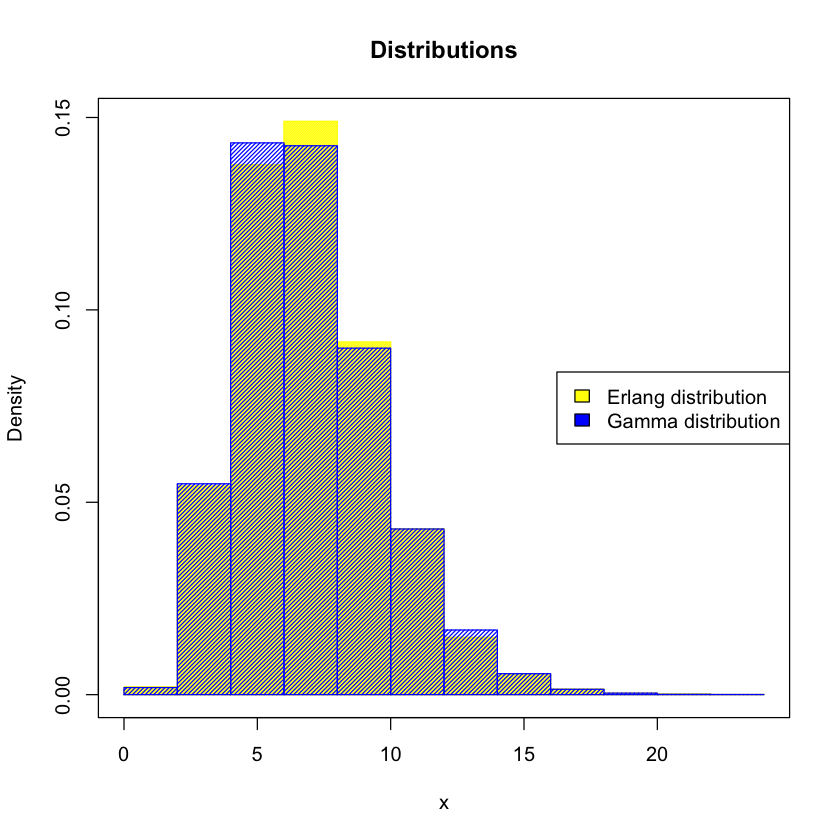

In [7]:
n = 10000 
m = 7
beta = 1

x1 = Erlang(n,m=m,beta=beta)

# Check if the algorithm obtained is correct 
# by comparing it with the yet defined function in R
x2 = rgamma(n,shape=m,rate=beta)


# Plot the histograms


hist(x1, col='yellow', xlab='x', ylab='Density', density=100, 
        main="Distributions", prob=TRUE)

hist(x2, col='blue', xlab='x', ylab='Density', density=40, prob=TRUE, add=TRUE)

legend("right",legend=c("Erlang distribution","Gamma distribution"),fill=c('yellow','blue'))

box()

## Exercise 4

In [8]:
VonNeumann = function(number,len){
    
           seq = NULL
           x = number
    
           for(i in 1:len){
                    
           # Seed length
           n = length(unlist(strsplit(as.character(x),"")))
           x.sq = x**2
           # Convert x.sq into a list of characters
           number = unlist(strsplit(as.character(x.sq),""))       
    
           # Define head and tail
           if(n%%2==0){
               head.length = n/2
               tail.length = n/2
           }
           else{
               head.length = floor(n/2)
               tail.length = floor(n/2)+1
           }
           
           # Resize vector number adding 0 
           number = c(rep(0, 2*n-length(number)), number) 
           
           # Take the middle part of the vector and reconvert
           x = number[(head.length+1):(2*n-tail.length)]
           x = as.numeric(paste(x, collapse=""))
           

           # Add x in the sequence of numbers
           seq = c(seq,x)             
           }      
           return(seq)
        }

cat('Pseudo-random generated numbers:',VonNeumann(number=260,len=15))

Pseudo-random generated numbers: 676 569 237 561 147 216 466 171 292 852 259 670 489 391 528